#### 0. Import all modules

In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011.ipynb
Beuermann_2011.dat*
Beuermann_2011.out
Kittipong_2020.dat*
Kittipong_2020.out
OC_Schwope_2002.jpg
Schwope_2002.dat*
Schwope_2002.out
Weighted_mean_calculation_gp1.txt
Weighted_mean_calculation_gp10.txt
Weighted_mean_calculation_gp11.txt
Weighted_mean_calculation_gp12.txt
Weighted_mean_calculation_gp13.txt
Weighted_mean_calculation_gp14.txt
Weighted_mean_calculation_gp15.txt
Weighted_mean_calculation_gp16.txt
Weighted_mean_calculation_gp17.txt
Weighted_mean_calculation_gp18.txt
Weighted_mean_calculation_gp19.txt
Weighted_mean_calculation_gp2.txt
Weighted_mean_calculation_gp20.txt
Weighted_mean_calculation_gp21.txt
Weighted_mean_calculation_gp22.txt
Weighted_mean_calculation_gp23.txt
Weighted_mean_calculation_gp24.txt
Weighted_mean_calculation_gp25.txt
Weighted_mean_calculation_gp3.txt
Weighted_mean_calculation_gp4.txt
Weighted_mean_calculation_gp5.txt
Weighted_mean_calculation_gp6.txt
Weighted_mean_calculation_gp7.txt
Weighte

#### 1. Read input file: Schwope_2002

In [3]:
DP_Leo_Schwope_2002 = open("Schwope_2002.dat",'r').readlines()
N_dpleo_Schwope_2002 = len(DP_Leo_Schwope_2002)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Schwope_2002.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

#### 2. Check the year and the local time of observation: Schwope_2002

In [4]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Schwope_2002))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Schwope_2002)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 44214.55325 1979-12-07 13:16:40.799989
1 44214.61562 1979-12-07 14:46:29.567984
2 44214.67798 1979-12-07 16:16:17.472013
3 44968.02309 1981-12-30 00:33:14.975982
4 44968.95712 1981-12-30 22:58:15.167993
5 44969.01962 1981-12-31 00:28:15.167993
6 44978.99755 1982-01-09 23:56:28.319997
7 44993.90078 1982-01-24 21:37:07.391982
8 44993.96328 1982-01-24 23:07:07.391982
9 44994.02642 1982-01-25 00:38:02.688000
10 45020.90513 1982-02-20 21:43:23.231987
11 45021.90292 1982-02-21 21:40:12.287981
12 45024.83386 1982-02-24 20:00:45.504011
13 45731.9664 1984-02-01 23:11:36.959982
14 45763.83373 1984-03-04 20:00:34.272006
15 45854.8828 1984-06-03 21:11:13.919981
16 46054.94231 1984-12-20 22:36:55.583986
17 46086.93565 1985-01-21 22:27:20.159989
18 46086.99796 1985-01-21 23:57:03.743985
19 48560.5578 1991-10-31 13:23:13.920005
20 48773.21509 1992-05-31 05:09:43.776006
21 48774.21293 1992-06-01 05:06:37.151993
22 49137.91294 1993-05-30 21:54:38.016015
23 49143.96214 1993-06-05 23:05:28.895996
24 49

#### 3. DP Leo parameters 

In [5]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
T0_bjd = 2448773.21461 - 2400000
T0_bjd_err = 0.00009
P0_day = 0.0623628426
P0_day_err = 0.0000000006

#### 4. Arrays of Schwope_2002 

In [6]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT_err = [i for i in range(N_dpleo_Schwope_2002)]
E_af = [i for i in range(N_dpleo_Schwope_2002)] #float number
E_ak = [i for i in range(N_dpleo_Schwope_2002)] #integer number
E_aj = [i for i in range(N_dpleo_Schwope_2002)] #integer number
P_aE = [i for i in range(N_dpleo_Schwope_2002)]
P_err_aE = [i for i in range(N_dpleo_Schwope_2002)]
T_aC_linear = [i for i in range(N_dpleo_Schwope_2002)]
T_aO_linear = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_a = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_std_a = [i for i in range(N_dpleo_Schwope_2002)]

#### 5. The O-C calculation of Schwope_2002 

In [7]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Schwope_2002):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Schwope_2002.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-73099	44214.553250	44214.553179	6.153171	8.157496
1	44214.615620	-73098	44214.615620	44214.615542	6.771570	8.157472
2	44214.677980	-73097	44214.677980	44214.677904	6.525970	8.157448
3	44968.023090	-61017	44968.023090	44968.021043	176.854239	92.278453
4	44968.957120	-61002	44968.957120	44968.956486	54.802229	92.278426
5	44969.019620	-61001	44969.019620	44969.018849	66.652628	92.278424
6	44978.997550	-60841	44978.997550	44978.996903	55.868526	92.278140
7	44993.900780	-60602	44993.900780	44993.901623	-72.814027	52.318025
8	44993.963280	-60601	44993.963280	44993.963986	-60.963627	52.318022
9	44994.026420	-60600	44994.026420	44994.026348	6.182772	52.318019
10	45020.905130	-60169	45020.905130	45020.904734	34.248896	12.615554
11	45021.902920	-60153	45021.902920	45021.902539	32.911286	12.615349
12	45024.833860	-60106	45024.833860	45024.833593	23.096056	52.316488
13	45731.966400	-48767	45731.966400	45731.965865	

#### 6. The O-C diagram of Schwope_2002  

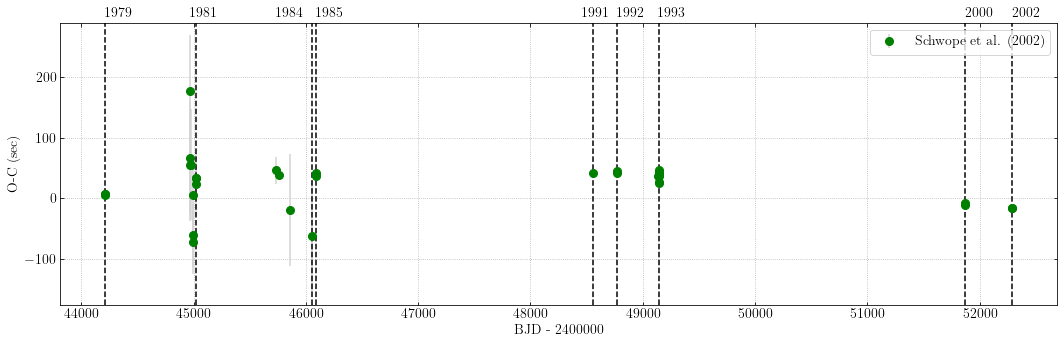

In [8]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2400000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 300, '1979')
plt.text(BJD_time_Schwope_2002[3], 300, '1981')
plt.text(BJD_time_Schwope_2002[13], 300, '1984')
plt.text(BJD_time_Schwope_2002[17], 300, '1985')
plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
plt.text(BJD_time_Schwope_2002[20], 300, '1992')
plt.text(BJD_time_Schwope_2002[22], 300, '1993')
plt.text(BJD_time_Schwope_2002[30], 300, '2000')
plt.text(BJD_time_Schwope_2002[32], 300, '2002')

plt.axvline(x= BJD_time_Schwope_2002[2], color='k', linestyle='--')
#plt.axvline(x= BJD_time_Schwope_2002[5], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[12], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[16], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[18], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[19], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[21], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[29], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[31], color='k', linestyle='--')
plt.axvline(x= BJD_time_Schwope_2002[33], color='k', linestyle='--')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 7. Group the data for calculating weighted mean: Schwope_2002

In [9]:
#Checkinng month,year from BJD
BJD_time = Data_Schwope_2002[:,0]
OC_s = Data_Schwope_2002[:,4]
OC_s_err = Data_Schwope_2002[:,5]


gp1 = []
gp2 = []
gp3 = []
gp4 = []
gp5 = []
gp6 = []
gp7 = []
gp8 = []
gp9 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[2] >= BJD_time[i]:        #gp1
        gp1.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[12] >= BJD_time[i]:       #gp2
        gp2.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[16] >= BJD_time[i]:       #gp3
        gp3.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[18] >= BJD_time[i]:       #gp4
        gp4.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[19] >= BJD_time[i]:       #gp5
        gp5.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[21] >= BJD_time[i]:       #gp6
        gp6.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[29] >= BJD_time[i]:       #gp7
        gp7.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[31] >= BJD_time[i]:       #gp8
        gp8.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[33] >= BJD_time[i]:       #gp9
        gp9.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
#-------------------------- Group1 -----------#        
rerults = gp1
f = open('Weighted_mean_calculation_gp1.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group2 -----------#        
rerults = gp2
f = open('Weighted_mean_calculation_gp2.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group3 -----------#        
rerults = gp3
f = open('Weighted_mean_calculation_gp3.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group4 -----------#        
rerults = gp4
f = open('Weighted_mean_calculation_gp4.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group5 -----------#        
rerults = gp5
f = open('Weighted_mean_calculation_gp5.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group6 -----------#        
rerults = gp6
f = open('Weighted_mean_calculation_gp6.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group7 -----------#        
rerults = gp7
f = open('Weighted_mean_calculation_gp7.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group8 -----------#        
rerults = gp8
f = open('Weighted_mean_calculation_gp8.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group9 -----------#        
rerults = gp9
f = open('Weighted_mean_calculation_gp9.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 1979-12-07 13:16:40.799989 44214.55325 6.153171 8.157496
1 1979-12-07 14:46:29.567984 44214.61562 6.77157 8.157472
2 1979-12-07 16:16:17.472013 44214.67798 6.52597 8.157448
3 1981-12-30 00:33:14.975982 44968.02309 176.854239 92.278453
4 1981-12-30 22:58:15.167993 44968.95712 54.802229 92.278426
5 1981-12-31 00:28:15.167993 44969.01962 66.652628 92.278424
6 1982-01-09 23:56:28.319997 44978.99755 55.868526 92.27814
7 1982-01-24 21:37:07.391982 44993.90078 -72.814027 52.318025
8 1982-01-24 23:07:07.391982 44993.96328 -60.963627 52.318022
9 1982-01-25 00:38:02.688000 44994.02642 6.182772 52.318019
10 1982-02-20 21:43:23.231987 45020.90513 34.248896 12.615554
11 1982-02-21 21:40:12.287981 45021.90292 32.911286 12.615349
12 1982-02-24 20:00:45.504011 45024.83386 23.096056 52.316488
13 1984-02-01 23:11:36.959982 45731.9664 46.230398 22.367137
14 1984-03-04 20:00:34.272006 45763.83373 39.096472 3.736885
15 1984-06-03 21:11:13.919981 45

#### 8. Check number of data for each group

In [10]:
#The 1st set of data point:
Input_gp1 = "Weighted_mean_calculation_gp1.txt"
Data_gp1   = np.genfromtxt(Input_gp1)
N_data_gp1 = len(Data_gp1)
print('Number of data group#1:',N_data_gp1)

#The 2nd set of data point:
Input_gp2 = "Weighted_mean_calculation_gp2.txt"
Data_gp2   = np.genfromtxt(Input_gp2)
N_data_gp2 = len(Data_gp2)
print('Number of data group#2:',N_data_gp2)

#The 3rd set of data point:
Input_gp3 = "Weighted_mean_calculation_gp3.txt"
Data_gp3   = np.genfromtxt(Input_gp3)
N_data_gp3 = len(Data_gp3)
print('Number of data group#3:',N_data_gp3)

#The 4th set of data point:
Input_gp4 = "Weighted_mean_calculation_gp4.txt"
Data_gp4   = np.genfromtxt(Input_gp4)
N_data_gp4 = len(Data_gp4)
print('Number of data group#4:',N_data_gp4)

#The 5th set of data point:
Input_gp5 = "Weighted_mean_calculation_gp5.txt"
Data_gp5   = np.genfromtxt(Input_gp5)
N_data_gp5 = len(Data_gp5)
print('Number of data group#5:',N_data_gp5)

#The 6th set of data point:
Input_gp6 = "Weighted_mean_calculation_gp6.txt"
Data_gp6   = np.genfromtxt(Input_gp6)
N_data_gp6 = len(Data_gp6)
print('Number of data group#6:',N_data_gp6)

#The 7th set of data point:
Input_gp7 = "Weighted_mean_calculation_gp7.txt"
Data_gp7   = np.genfromtxt(Input_gp7)
N_data_gp7 = len(Data_gp7)
print('Number of data group#7:',N_data_gp7)

#The 8th set of data point:
Input_gp8 = "Weighted_mean_calculation_gp8.txt"
Data_gp8   = np.genfromtxt(Input_gp8)
N_data_gp8 = len(Data_gp8)
print('Number of data group#8:',N_data_gp8)

#The 9th set of data point:
Input_gp9 = "Weighted_mean_calculation_gp9.txt"
Data_gp9   = np.genfromtxt(Input_gp9)
N_data_gp9 = len(Data_gp9)
print('Number of data group#9:',N_data_gp9)

Number of data group#1: 3
Number of data group#2: 10
Number of data group#3: 4
Number of data group#4: 2
Number of data group#5: 3
Number of data group#6: 2
Number of data group#7: 8
Number of data group#8: 2
Number of data group#9: 2


#### 9. Weighted mean calculation 

In [11]:
#Group1
OC_a1 = [i for i in range(N_data_gp1)]
OC_err_a1 = [i for i in range(N_data_gp1)]
w_a1 = [i for i in range(N_data_gp1)]
y_a1 = [i for i in range(N_data_gp1)]

for i in range(N_data_gp1):
    BJD_time = Data_gp1[:,0]                   #Input file of x
    OC_s = Data_gp1[:,1]                       #Input file of y
    OC_a1[i] = OC_s 
    OC_s_err = Data_gp1[:,2]                   #Input file of y_err
    OC_err_a1[i] = OC_s_err
    w = 1/(OC_err_a1[i])**2                    #calculate the weighting factor
    w_a1[i] = w
    y = (w_a1[i]*OC_a1[i])                     #Calculate the weighting factor and the y-value
    y_a1[i] = y
    y_sum = np.sum(y_a1)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a1)                       #Sum the weighting factor 
    dy = (w_a1[i]*OC_err_a1[i])/np.sum(w_a1[i])
#print(y_sum, w_sum)
x1_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y1_aver = y_sum/w_sum                         #Calculate the weighted mean
y1_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x1_aver)                   #Print Mean BJD
print('Weighted OC:', y1_aver)                #Print the weighted mean
print('Weighted OC_err:',y1_err)              #Print the error of the weighted mean

Mean BJD: 44214.61561666667
Weighted OC: 6.4835710645358
Weighted OC_err: 8.157471999905852


/Users/kittipongwangnok/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [12]:
#Group2
OC_a2 = [i for i in range(N_data_gp2)]
OC_err_a2 = [i for i in range(N_data_gp2)]
w_a2 = [i for i in range(N_data_gp2)]
y_a2 = [i for i in range(N_data_gp2)]

for i in range(N_data_gp2):
    BJD_time = Data_gp2[:,0]                   #Input file of x
    OC_s = Data_gp2[:,1]                       #Input file of y
    OC_a2[i] = OC_s 
    OC_s_err = Data_gp2[:,2]                   #Input file of y_err
    OC_err_a2[i] = OC_s_err
    w = 1/(OC_err_a2[i])**2                    #calculate the weighting factor
    w_a2[i] = w
    y = (w_a2[i]*OC_a2[i])                     #Calculate the weighting factor and the y-value
    y_a2[i] = y
    y_sum = np.sum(y_a2)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a2)                       #Sum the weighting factor 
    dy = (w_a2[i]*OC_err_a2[i])/np.sum(w_a2[i])
#print(y_sum, w_sum)
x2_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y2_aver = y_sum/w_sum                         #Calculate the weighted mean
y2_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x2_aver)                   #Print Mean BJD
print('Weighted OC:', y2_aver)                #Print the weighted mean
print('Weighted OC_err:',y2_err)              #Print the error of the weighted mean

Mean BJD: 44993.45297700001
Weighted OC: 29.342825353061833
Weighted OC_err: 19.198545624431976


In [13]:
#Group3
OC_a3 = [i for i in range(N_data_gp3)]
OC_err_a3 = [i for i in range(N_data_gp3)]
w_a3 = [i for i in range(N_data_gp3)]
y_a3 = [i for i in range(N_data_gp3)]

for i in range(N_data_gp3):
    BJD_time = Data_gp3[:,0]                   #Input file of x
    OC_s = Data_gp3[:,1]                       #Input file of y
    OC_a3[i] = OC_s 
    OC_s_err = Data_gp3[:,2]                   #Input file of y_err
    OC_err_a3[i] = OC_s_err
    w = 1/(OC_err_a3[i])**2                    #calculate the weighting factor
    w_a3[i] = w
    y = (w_a3[i]*OC_a3[i])                     #Calculate the weighting factor and the y-value
    y_a3[i] = y
    y_sum = np.sum(y_a3)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a3)                       #Sum the weighting factor 
    dy = (w_a3[i]*OC_err_a3[i])/np.sum(w_a3[i])
#print(y_sum, w_sum)
x3_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y3_aver = y_sum/w_sum                         #Calculate the weighted mean
y3_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x3_aver)                   #Print Mean BJD
print('Weighted OC:', y3_aver)                #Print the weighted mean
print('Weighted OC_err:',y3_err)              #Print the error of the weighted mean

Mean BJD: 45851.40630999999
Weighted OC: 39.03531828805032
Weighted OC_err: 4.522857486468389


In [14]:
#Group4
OC_a4 = [i for i in range(N_data_gp4)]
OC_err_a4 = [i for i in range(N_data_gp4)]
w_a4 = [i for i in range(N_data_gp4)]
y_a4 = [i for i in range(N_data_gp4)]

for i in range(N_data_gp4):
    BJD_time = Data_gp4[:,0]                   #Input file of x
    OC_s = Data_gp4[:,1]                       #Input file of y
    OC_a4[i] = OC_s 
    OC_s_err = Data_gp4[:,2]                   #Input file of y_err
    OC_err_a4[i] = OC_s_err
    w = 1/(OC_err_a4[i])**2                    #calculate the weighting factor
    w_a4[i] = w
    y = (w_a4[i]*OC_a4[i])                     #Calculate the weighting factor and the y-value
    y_a4[i] = y
    y_sum = np.sum(y_a4)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a4)                       #Sum the weighting factor 
    dy = (w_a4[i]*OC_err_a4[i])/np.sum(w_a4[i])
#print(y_sum, w_sum)
x4_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y4_aver = y_sum/w_sum                         #Calculate the weighted mean
y4_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x4_aver)                   #Print Mean BJD
print('Weighted OC:', y4_aver)                #Print the weighted mean
print('Weighted OC_err:',y4_err)              #Print the error of the weighted mean

Mean BJD: 46086.966805000004
Weighted OC: 39.620745974624086
Weighted OC_err: 5.2724019999541


In [15]:
#Group5
x5_aver = 48560.557800000002
y5_aver = 41.754170
y5_err =  3.779816

In [16]:
#Group6
OC_a6 = [i for i in range(N_data_gp6)]
OC_err_a6 = [i for i in range(N_data_gp6)]
w_a6 = [i for i in range(N_data_gp6)]
y_a6 = [i for i in range(N_data_gp6)]

for i in range(N_data_gp6):
    BJD_time = Data_gp6[:,0]                   #Input file of x
    OC_s = Data_gp6[:,1]                       #Input file of y
    OC_a6[i] = OC_s 
    OC_s_err = Data_gp6[:,2]                   #Input file of y_err
    OC_err_a6[i] = OC_s_err
    w = 1/(OC_err_a6[i])**2                    #calculate the weighting factor
    w_a6[i] = w
    y = (w_a6[i]*OC_a6[i])                     #Calculate the weighting factor and the y-value
    y_a6[i] = y
    y_sum = np.sum(y_a6)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a6)                       #Sum the weighting factor 
    dy = (w_a6[i]*OC_err_a6[i])/np.sum(w_a6[i])
#print(y_sum, w_sum)
x6_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y6_aver = y_sum/w_sum                         #Calculate the weighted mean
y6_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x6_aver)                   #Print Mean BJD
print('Weighted OC:', y6_aver)                #Print the weighted mean
print('Weighted OC_err:',y6_err)              #Print the error of the weighted mean

Mean BJD: 48773.714009999996
Weighted OC: 42.963183
Weighted OC_err: 2.776032


In [17]:
#Group7
OC_a7 = [i for i in range(N_data_gp7)]
OC_err_a7 = [i for i in range(N_data_gp7)]
w_a7 = [i for i in range(N_data_gp7)]
y_a7 = [i for i in range(N_data_gp7)]

for i in range(N_data_gp7):
    BJD_time = Data_gp7[:,0]                   #Input file of x
    OC_s = Data_gp7[:,1]                       #Input file of y
    OC_a7[i] = OC_s 
    OC_s_err = Data_gp7[:,2]                   #Input file of y_err
    OC_err_a7[i] = OC_s_err
    w = 1/(OC_err_a7[i])**2                    #calculate the weighting factor
    w_a7[i] = w
    y = (w_a7[i]*OC_a7[i])                     #Calculate the weighting factor and the y-value
    y_a7[i] = y
    y_sum = np.sum(y_a7)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a7)                       #Sum the weighting factor 
    dy = (w_a7[i]*OC_err_a7[i])/np.sum(w_a7[i])
#print(y_sum, w_sum)
x7_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y7_aver = y_sum/w_sum                         #Calculate the weighted mean
y7_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x7_aver)                   #Print Mean BJD
print('Weighted OC:', y7_aver)                #Print the weighted mean
print('Weighted OC_err:',y7_err)              #Print the error of the weighted mean

Mean BJD: 49143.77505
Weighted OC: 37.08890758032905
Weighted OC_err: 2.793070219408939


In [18]:
#Group8
OC_a8 = [i for i in range(N_data_gp8)]
OC_err_a8 = [i for i in range(N_data_gp8)]
w_a8 = [i for i in range(N_data_gp8)]
y_a8 = [i for i in range(N_data_gp8)]

for i in range(N_data_gp8):
    BJD_time = Data_gp8[:,0]                   #Input file of x
    OC_s = Data_gp8[:,1]                       #Input file of y
    OC_a8[i] = OC_s 
    OC_s_err = Data_gp8[:,2]                   #Input file of y_err
    OC_err_a8[i] = OC_s_err
    w = 1/(OC_err_a8[i])**2                    #calculate the weighting factor
    w_a8[i] = w
    y = (w_a8[i]*OC_a8[i])                     #Calculate the weighting factor and the y-value
    y_a8[i] = y
    y_sum = np.sum(y_a8)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a8)                       #Sum the weighting factor 
    dy = (w_a8[i]*OC_err_a8[i])/np.sum(w_a8[i])
#print(y_sum, w_sum)
x8_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y8_aver = y_sum/w_sum                         #Calculate the weighted mean
y8_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x8_aver)                   #Print Mean BJD
print('Weighted OC:', y8_aver)                #Print the weighted mean
print('Weighted OC_err:',y8_err)              #Print the error of the weighted mean

Mean BJD: 51870.839255
Weighted OC: -9.485421696459348
Weighted OC_err: 3.7863824993343247


In [19]:
#Group9
OC_a9 = [i for i in range(N_data_gp9)]
OC_err_a9 = [i for i in range(N_data_gp9)]
w_a9 = [i for i in range(N_data_gp9)]
y_a9 = [i for i in range(N_data_gp9)]

for i in range(N_data_gp9):
    BJD_time = Data_gp9[:,0]                   #Input file of x
    OC_s = Data_gp9[:,1]                       #Input file of y
    OC_a9[i] = OC_s 
    OC_s_err = Data_gp9[:,2]                   #Input file of y_err
    OC_err_a9[i] = OC_s_err
    w = 1/(OC_err_a9[i])**2                    #calculate the weighting factor
    w_a9[i] = w
    y = (w_a9[i]*OC_a9[i])                     #Calculate the weighting factor and the y-value
    y_a9[i] = y
    y_sum = np.sum(y_a9)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a9)                       #Sum the weighting factor 
    dy = (w_a9[i]*OC_err_a9[i])/np.sum(w_a9[i])
#print(y_sum, w_sum)
x9_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y9_aver = y_sum/w_sum                         #Calculate the weighted mean
y9_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x9_aver)                   #Print Mean BJD
print('Weighted OC:', y9_aver)                #Print the weighted mean
print('Weighted OC_err:',y9_err)              #Print the error of the weighted mean

Mean BJD: 52284.71018
Weighted OC: -16.381069493581908
Weighted OC_err: 7.171144891554933


#### 10. Plo the O-C diagram of DP Leo

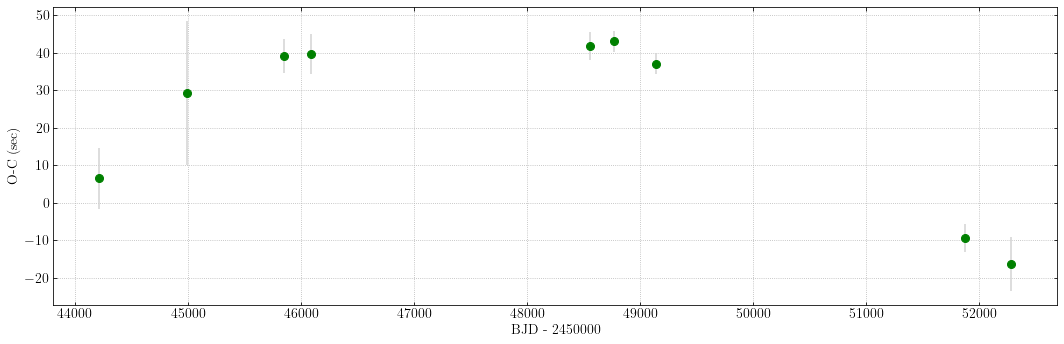

In [20]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_aver, y1_aver, yerr = y1_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x2_aver, y2_aver, yerr = y2_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x3_aver, y3_aver, yerr = y3_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x4_aver, y4_aver, yerr = y4_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x5_aver, y5_aver, yerr = y5_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x6_aver, y6_aver, yerr = y6_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x7_aver, y7_aver, yerr = y7_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x8_aver, y8_aver, yerr = y8_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)
plt.errorbar(x9_aver, y9_aver, yerr = y9_err, fmt='o', markersize=8, color='green',ecolor='lightgray',)

#Schwope_2002
#plt.text(x1_aver, 62, '1979')
#plt.text(x2_aver, 62, '1981')
#plt.text(x3_aver-30, 62, '1984')
#plt.text(x4_aver+30, 62, '1985')
#plt.text(x5_aver-100, 62, '1991')
#plt.text(x6_aver, 62, '1992')
#plt.text(x7_aver, 62, '1993')
#plt.text(x8_aver, 62, '2000')
#plt.text(x9_aver, 62, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-100,60)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 11. Read input file: Beuermann_2011

In [21]:
#Input file: Beuermann_2011
DP_Leo_Beuermann_2011 = open("Beuermann_2011.dat",'r').readlines()
N_dpleo_Beuermann_2011 = len(DP_Leo_Beuermann_2011)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Beuermann_2011.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

#### 12. Check the year and the local time of observation: Beuermann_2011

In [22]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Beuermann_2011))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Beuermann_2011)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 54914.83228 2009-03-24 19:58:28.992017
1 54914.894663 2009-03-24 21:28:18.883201
2 54916.827926 2009-03-26 19:52:12.806409
3 54919.696603 2009-03-29 16:43:06.499214
4 54920.756784 2009-03-30 18:09:46.137597
5 54922.627668 2009-04-01 15:03:50.515184
6 54922.690017 2009-04-01 16:33:37.468786
7 54922.752365 2009-04-01 18:03:24.336006
8 54922.814727 2009-04-01 19:33:12.412796
9 54937.781831 2009-04-16 18:45:50.198400
10 54937.844195 2009-04-16 20:15:38.447991
11 54938.717285 2009-04-17 17:12:53.423981
12 54938.779611 2009-04-17 18:42:38.390387
13 54940.650507 2009-04-19 15:36:43.804783
14 54940.712869 2009-04-19 17:06:31.881613
15 54940.775243 2009-04-19 18:36:20.995211
16 54940.837637 2009-04-19 20:06:11.836781
17 54941.773045 2009-04-20 18:33:11.088013
18 54941.835408 2009-04-20 20:02:59.251183
19 54942.646122 2009-04-21 15:30:24.940815
20 54942.770852 2009-04-21 18:30:01.612798
21 54942.833221 2009-04-21 19:59:50.294413
22 54942.895591 2009-04-21 21:29:39.062408
23 54943.706304 2009-0

#### 13. Arrays of Beuermann_2011

In [23]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT_err = [i for i in range(N_dpleo_Beuermann_2011)]
E_af = [i for i in range(N_dpleo_Beuermann_2011)] #float number
E_ak = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
E_aj = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
P_aE = [i for i in range(N_dpleo_Beuermann_2011)]
P_err_aE = [i for i in range(N_dpleo_Beuermann_2011)]
T_aC_linear = [i for i in range(N_dpleo_Beuermann_2011)]
T_aO_linear = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_a = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_std_a = [i for i in range(N_dpleo_Beuermann_2011)]

#### 14. The O-C calculation of Beuermann_2011

In [24]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Beuermann_2011):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 2
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Beuermann_2011.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	54914.832280	98482	54914.832280	54914.832075	17.717759	8.454642
1	54914.894663	98483	54914.894663	54914.894438	19.459359	8.317590
2	54916.827926	98514	54916.827926	54916.827686	20.744939	8.115533
3	54919.696603	98560	54919.696603	54919.696377	19.556109	8.117034
4	54920.756784	98577	54920.756784	54920.756545	20.651298	8.184900
5	54922.627668	98607	54922.627668	54922.627430	20.540879	8.185871
6	54922.690017	98608	54922.690017	54922.689793	19.344878	8.596897
7	54922.752365	98609	54922.752365	54922.752156	18.062478	8.596928
8	54922.814727	98610	54922.814727	54922.814519	17.989677	8.527647
9	54937.781831	98850	54937.781831	54937.781601	19.871124	8.193743
10	54937.844195	98851	54937.844195	54937.843964	19.971123	8.466207
11	54938.717285	98865	54938.717285	54938.717044	20.852714	8.261821
12	54938.779611	98866	54938.779611	54938.779406	17.669514	8.604857
13	54940.650507	98896	54940.650507	54940.650292	18.595894	7.477445
14	5

#### 15. The O-C diagram of Beuermann_2011

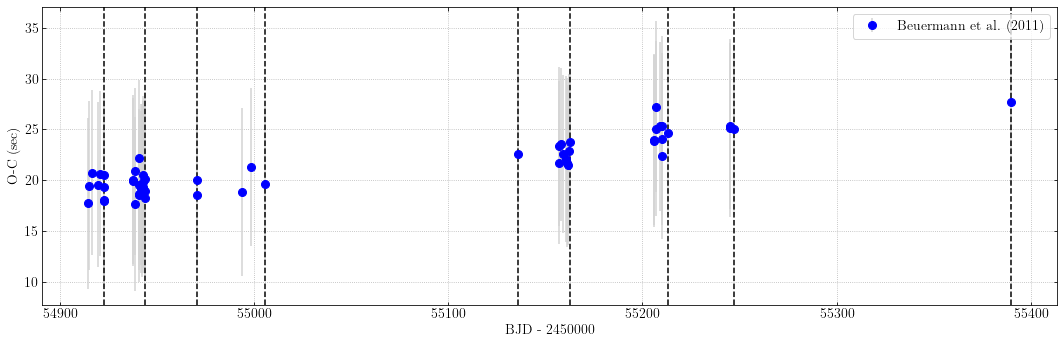

In [25]:
#Plot O-C vs BJD
Input_Beuermann_2011  = 'Beuermann_2011.out'
Data_Beuermann_2011   = np.genfromtxt(Input_Beuermann_2011)

N = 2450000
BJD_time_Beuermann_2011 = Data_Beuermann_2011[:,0]
Cycle_Beuermann_2011 = Data_Beuermann_2011[:,1]
T_O_linear_Beuermann_2011 = Data_Beuermann_2011[:,2]
T_C_linear_Beuermann_2011 = Data_Beuermann_2011[:,3]
OC_s_Beuermann_2011= Data_Beuermann_2011[:,4]
OC_s_err_Beuermann_2011 = Data_Beuermann_2011[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Beuermann_2011)
x2 = max(BJD_time_Beuermann_2011)
plt.errorbar(BJD_time_Beuermann_2011, OC_s_Beuermann_2011, yerr= OC_s_err_Beuermann_2011, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')

#Beuermann_2011
#plt.text(BJD_time_Beuermann_2011[0], 38, '2002')
#plt.text(BJD_time_Beuermann_2011[1], 38, '2009')
#plt.text(BJD_time_Beuermann_2011[42], 38, '2010')

plt.axvline(x= BJD_time_Beuermann_2011[8], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[25], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[27], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[30], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[31], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[40], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[49], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[52], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[53], color='k', linestyle='--')

#plt.text(BJD_time_Beuermann_2011[8], -25, '1')
#plt.text(BJD_time_Beuermann_2011[25], -25, '2')
#plt.text(BJD_time_Beuermann_2011[27], -25, '3')
#plt.text(BJD_time_Beuermann_2011[30], -25, '4')
#plt.text(BJD_time_Beuermann_2011[31], -25, '5')
#plt.text(BJD_time_Beuermann_2011[40], -25, '6')
#plt.text(BJD_time_Beuermann_2011[49], -25, '7')
#plt.text(BJD_time_Beuermann_2011[52], -25, '8')
#plt.text(BJD_time_Beuermann_2011[53], -25, '9')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Beuermann_2011.jpg", dpi=1000)
plt.show()

#### 16. Group the data for calculating weighted mean: Schwope_2002

In [26]:
#Checkinng month,year from BJD
BJD_time = Data_Beuermann_2011[:,0]
OC_s = Data_Beuermann_2011[:,4]
OC_s_err = Data_Beuermann_2011[:,5]


gp10 = []
gp11 = []
gp12 = []
gp13 = []
gp14 = []
gp15 = []
gp16 = []
gp17 = []
gp18 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[8] >= BJD_time[i]:        #gp10
        gp10.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[25] >= BJD_time[i]:       #gp11
        gp11.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[27] >= BJD_time[i]:       #gp12
        gp12.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[30] >= BJD_time[i]:       #gp13
        gp13.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[31] >= BJD_time[i]:       #gp14
        gp14.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[40] >= BJD_time[i]:       #gp15
        gp15.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[49] >= BJD_time[i]:       #gp16
        gp16.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[52] >= BJD_time[i]:       #gp17
        gp17.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[53] >= BJD_time[i]:       #gp18
        gp18.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    
#-------------------------- Group10 -----------#        
rerults = gp10
f = open('Weighted_mean_calculation_gp10.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group11 -----------#        
rerults = gp11
f = open('Weighted_mean_calculation_gp11.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group12 -----------#        
rerults = gp12
f = open('Weighted_mean_calculation_gp12.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group13 -----------#        
rerults = gp13
f = open('Weighted_mean_calculation_gp13.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group14 -----------#        
rerults = gp14
f = open('Weighted_mean_calculation_gp14.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group15 -----------#        
rerults = gp15
f = open('Weighted_mean_calculation_gp15.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group16 -----------#        
rerults = gp16
f = open('Weighted_mean_calculation_gp16.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group17 -----------#        
rerults = gp17
f = open('Weighted_mean_calculation_gp17.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group18 -----------#        
rerults = gp18
f = open('Weighted_mean_calculation_gp18.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 2009-03-24 19:58:28.992017 54914.83228 17.717759 8.454642
1 2009-03-24 21:28:18.883201 54914.894663 19.459359 8.31759
2 2009-03-26 19:52:12.806409 54916.827926 20.744939 8.115533
3 2009-03-29 16:43:06.499214 54919.696603 19.556109 8.117034
4 2009-03-30 18:09:46.137597 54920.756784 20.651298 8.1849
5 2009-04-01 15:03:50.515184 54922.627668 20.540879 8.185871
6 2009-04-01 16:33:37.468786 54922.690017 19.344878 8.596897
7 2009-04-01 18:03:24.336006 54922.752365 18.062478 8.596928
8 2009-04-01 19:33:12.412796 54922.814727 17.989677 8.527647
9 2009-04-16 18:45:50.198400 54937.781831 19.871124 8.193743
10 2009-04-16 20:15:38.447991 54937.844195 19.971123 8.466207
11 2009-04-17 17:12:53.423981 54938.717285 20.852714 8.261821
12 2009-04-17 18:42:38.390387 54938.779611 17.669514 8.604857
13 2009-04-19 15:36:43.804783 54940.650507 18.595894 7.477445
14 2009-04-19 17:06:31.881613 54940.712869 18.523094 8.536574
15 2009-04-19 18:36:20.9952

#### 17. Check number of data for each group

In [27]:
#The 10th set of data point:
Input_gp10 = "Weighted_mean_calculation_gp10.txt"
Data_gp10   = np.genfromtxt(Input_gp10)
N_data_gp10 = len(Data_gp10)
print('Number of data group#10:',N_data_gp10)

#The 11th set of data point:
Input_gp11 = "Weighted_mean_calculation_gp11.txt"
Data_gp11   = np.genfromtxt(Input_gp11)
N_data_gp11 = len(Data_gp11)
print('Number of data group#11:',N_data_gp11)

#The 12th set of data point:
Input_gp12 = "Weighted_mean_calculation_gp12.txt"
Data_gp12   = np.genfromtxt(Input_gp12)
N_data_gp12 = len(Data_gp12)
print('Number of data group#12:',N_data_gp12)

#The 13th set of data point:
Input_gp13 = "Weighted_mean_calculation_gp13.txt"
Data_gp13   = np.genfromtxt(Input_gp13)
N_data_gp13 = len(Data_gp13)
print('Number of data group#13:',N_data_gp13)

#The 14th set of data point:
Input_gp14 = "Weighted_mean_calculation_gp14.txt"
Data_gp14   = np.genfromtxt(Input_gp14)
N_data_gp14 = len(Data_gp14)
print('Number of data group#14:',N_data_gp14)

#The 15th set of data point:
Input_gp15 = "Weighted_mean_calculation_gp15.txt"
Data_gp15   = np.genfromtxt(Input_gp15)
N_data_gp15 = len(Data_gp15)
print('Number of data group#15:',N_data_gp15)

#The 16th set of data point:
Input_gp16 = "Weighted_mean_calculation_gp16.txt"
Data_gp16   = np.genfromtxt(Input_gp16)
N_data_gp16 = len(Data_gp16)
print('Number of data group#16:',N_data_gp16)

#The 17th set of data point:
Input_gp17 = "Weighted_mean_calculation_gp17.txt"
Data_gp17   = np.genfromtxt(Input_gp17)
N_data_gp17 = len(Data_gp17)
print('Number of data group#17:',N_data_gp17)

#The 18th set of data point:
Input_gp18 = "Weighted_mean_calculation_gp18.txt"
Data_gp18   = np.genfromtxt(Input_gp18)
N_data_gp18 = len(Data_gp18)
print('Number of data group#18:',N_data_gp18)

Number of data group#10: 9
Number of data group#11: 17
Number of data group#12: 2
Number of data group#13: 3
Number of data group#14: 3
Number of data group#15: 9
Number of data group#16: 9
Number of data group#17: 3
Number of data group#18: 3


#### 18. Weighted mean calculation 

In [28]:
#Group10
OC_a10 = [i for i in range(N_data_gp10)]
OC_err_a10 = [i for i in range(N_data_gp10)]
w_a10 = [i for i in range(N_data_gp10)]
y_a10 = [i for i in range(N_data_gp10)]

for i in range(N_data_gp10):
    BJD_time = Data_gp10[:,0]                   #Input file of x
    OC_s = Data_gp10[:,1]                       #Input file of y
    OC_a10[i] = OC_s 
    OC_s_err = Data_gp10[:,2]                   #Input file of y_err
    OC_err_a10[i] = OC_s_err
    w = 1/(OC_err_a10[i])**2                    #calculate the weighting factor
    w_a10[i] = w
    y = (w_a10[i]*OC_a10[i])                     #Calculate the weighting factor and the y-value
    y_a10[i] = y
    y_sum = np.sum(y_a10)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a10)                       #Sum the weighting factor 
    dy = (w_a10[i]*OC_err_a10[i])/np.sum(w_a10[i])
#print(y_sum, w_sum)
x10_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y10_aver = y_sum/w_sum                         #Calculate the weighted mean
y10_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x10_aver)                   #Print Mean BJD
print('Weighted OC:', y10_aver)                #Print the weighted mean
print('Weighted OC_err:',y10_err)              #Print the error of the weighted mean

Mean BJD: 54919.76589255556
Weighted OC: 19.38131648699995
Weighted OC_err: 8.335404372228378


/Users/kittipongwangnok/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [29]:
#Group11
OC_a11 = [i for i in range(N_data_gp11)]
OC_err_a11 = [i for i in range(N_data_gp11)]
w_a11 = [i for i in range(N_data_gp11)]
y_a11 = [i for i in range(N_data_gp11)]

for i in range(N_data_gp11):
    BJD_time = Data_gp11[:,0]                   #Input file of x
    OC_s = Data_gp11[:,1]                       #Input file of y
    OC_a11[i] = OC_s 
    OC_s_err = Data_gp11[:,2]                   #Input file of y_err
    OC_err_a11[i] = OC_s_err
    w = 1/(OC_err_a11[i])**2                    #calculate the weighting factor
    w_a11[i] = w
    y = (w_a11[i]*OC_a11[i])                     #Calculate the weighting factor and the y-value
    y_a11[i] = y
    y_sum = np.sum(y_a11)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a11)                       #Sum the weighting factor 
    dy = (w_a11[i]*OC_err_a11[i])/np.sum(w_a11[i])
#print(y_sum, w_sum)
x11_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y11_aver = y_sum/w_sum                         #Calculate the weighted mean
y11_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x11_aver)                   #Print Mean BJD
print('Weighted OC:', y11_aver)                #Print the weighted mean
print('Weighted OC_err:',y11_err)              #Print the error of the weighted mean

Mean BJD: 54941.303493058826
Weighted OC: 19.53245053225471
Weighted OC_err: 8.08520653804495


In [30]:
#Group12
OC_a12 = [i for i in range(N_data_gp12)]
OC_err_a12 = [i for i in range(N_data_gp12)]
w_a12 = [i for i in range(N_data_gp12)]
y_a12 = [i for i in range(N_data_gp12)]

for i in range(N_data_gp12):
    BJD_time = Data_gp12[:,0]                   #Input file of x
    OC_s = Data_gp12[:,1]                       #Input file of y
    OC_a12[i] = OC_s 
    OC_s_err = Data_gp12[:,2]                   #Input file of y_err
    OC_err_a12[i] = OC_s_err
    w = 1/(OC_err_a12[i])**2                    #calculate the weighting factor
    w_a12[i] = w
    y = (w_a12[i]*OC_a12[i])                     #Calculate the weighting factor and the y-value
    y_a12[i] = y
    y_sum = np.sum(y_a12)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a12)                       #Sum the weighting factor 
    dy = (w_a12[i]*OC_err_a12[i])/np.sum(w_a12[i])
#print(y_sum, w_sum)
x12_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y12_aver = y_sum/w_sum                         #Calculate the weighted mean
y12_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x12_aver)                   #Print Mean BJD
print('Weighted OC:', y12_aver)                #Print the weighted mean
print('Weighted OC_err:',y12_err)              #Print the error of the weighted mean

Mean BJD: 54970.6782235
Weighted OC: 19.27522080140876
Weighted OC_err: 6.640627041310005


In [31]:
#Group13
OC_a13 = [i for i in range(N_data_gp13)]
OC_err_a13 = [i for i in range(N_data_gp13)]
w_a13 = [i for i in range(N_data_gp13)]
y_a13 = [i for i in range(N_data_gp13)]

for i in range(N_data_gp13):
    BJD_time = Data_gp13[:,0]                   #Input file of x
    OC_s = Data_gp13[:,1]                       #Input file of y
    OC_a13[i] = OC_s 
    OC_s_err = Data_gp13[:,2]                   #Input file of y_err
    OC_err_a13[i] = OC_s_err
    w = 1/(OC_err_a13[i])**2                    #calculate the weighting factor
    w_a13[i] = w
    y = (w_a13[i]*OC_a13[i])                     #Calculate the weighting factor and the y-value
    y_a13[i] = y
    y_sum = np.sum(y_a13)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a13)                       #Sum the weighting factor 
    dy = (w_a13[i]*OC_err_a13[i])/np.sum(w_a13[i])
#print(y_sum, w_sum)
x13_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y13_aver = y_sum/w_sum                         #Calculate the weighted mean
y13_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x13_aver)                   #Print Mean BJD
print('Weighted OC:', y13_aver)                #Print the weighted mean
print('Weighted OC_err:',y13_err)              #Print the error of the weighted mean

Mean BJD: 54999.31316966666
Weighted OC: 19.966631173599144
Weighted OC_err: 7.85500422869808


In [32]:
#Group14
x14_aver = 55135.970975999997 
y14_aver = 22.568289
y14_err = 7.841245

In [33]:
#Group15
OC_a15 = [i for i in range(N_data_gp15)]
OC_err_a15 = [i for i in range(N_data_gp15)]
w_a15 = [i for i in range(N_data_gp15)]
y_a15 = [i for i in range(N_data_gp15)]

for i in range(N_data_gp15):
    BJD_time = Data_gp15[:,0]                   #Input file of x
    OC_s = Data_gp15[:,1]                       #Input file of y
    OC_a15[i] = OC_s 
    OC_s_err = Data_gp15[:,2]                   #Input file of y_err
    OC_err_a15[i] = OC_s_err
    w = 1/(OC_err_a15[i])**2                    #calculate the weighting factor
    w_a15[i] = w
    y = (w_a15[i]*OC_a15[i])                     #Calculate the weighting factor and the y-value
    y_a15[i] = y
    y_sum = np.sum(y_a15)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a15)                       #Sum the weighting factor 
    dy = (w_a15[i]*OC_err_a15[i])/np.sum(w_a15[i])
#print(y_sum, w_sum)
x15_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y15_aver = y_sum/w_sum                         #Calculate the weighted mean
y15_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x15_aver)                   #Print Mean BJD
print('Weighted OC:', y15_aver)                #Print the weighted mean
print('Weighted OC_err:',y15_err)              #Print the error of the weighted mean

Mean BJD: 55159.94602433333
Weighted OC: 22.62034743912124
Weighted OC_err: 7.806320932864725


In [34]:
#Group16
OC_a16 = [i for i in range(N_data_gp16)]
OC_err_a16 = [i for i in range(N_data_gp16)]
w_a16 = [i for i in range(N_data_gp16)]
y_a16 = [i for i in range(N_data_gp16)]

for i in range(N_data_gp16):
    BJD_time = Data_gp16[:,0]                   #Input file of x
    OC_s = Data_gp16[:,1]                       #Input file of y
    OC_a16[i] = OC_s 
    OC_s_err = Data_gp16[:,2]                   #Input file of y_err
    OC_err_a16[i] = OC_s_err
    w = 1/(OC_err_a16[i])**2                    #calculate the weighting factor
    w_a16[i] = w
    y = (w_a16[i]*OC_a16[i])                     #Calculate the weighting factor and the y-value
    y_a16[i] = y
    y_sum = np.sum(y_a16)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a16)                       #Sum the weighting factor 
    dy = (w_a16[i]*OC_err_a16[i])/np.sum(w_a16[i])
#print(y_sum, w_sum)
x16_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y16_aver = y_sum/w_sum                         #Calculate the weighted mean
y16_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x16_aver)                   #Print Mean BJD
print('Weighted OC:', y16_aver)                #Print the weighted mean
print('Weighted OC_err:',y16_err)              #Print the error of the weighted mean

Mean BJD: 55208.616782666664
Weighted OC: 24.645984166816625
Weighted OC_err: 8.425534704734046


In [35]:
#Group17
OC_a17 = [i for i in range(N_data_gp17)]
OC_err_a17 = [i for i in range(N_data_gp17)]
w_a17 = [i for i in range(N_data_gp17)]
y_a17 = [i for i in range(N_data_gp17)]

for i in range(N_data_gp17):
    BJD_time = Data_gp17[:,0]                   #Input file of x
    OC_s = Data_gp17[:,1]                       #Input file of y
    OC_a17[i] = OC_s 
    OC_s_err = Data_gp17[:,2]                   #Input file of y_err
    OC_err_a17[i] = OC_s_err
    w = 1/(OC_err_a17[i])**2                    #calculate the weighting factor
    w_a17[i] = w
    y = (w_a17[i]*OC_a17[i])                     #Calculate the weighting factor and the y-value
    y_a17[i] = y
    y_sum = np.sum(y_a17)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a17)                       #Sum the weighting factor 
    dy = (w_a17[i]*OC_err_a17[i])/np.sum(w_a17[i])
#print(y_sum, w_sum)
x17_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y17_aver = y_sum/w_sum                         #Calculate the weighted mean
y17_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x17_aver)                   #Print Mean BJD
print('Weighted OC:', y17_aver)                #Print the weighted mean
print('Weighted OC_err:',y17_err)              #Print the error of the weighted mean

Mean BJD: 55245.625670999994
Weighted OC: 25.171654261063914
Weighted OC_err: 8.457430322248435


In [36]:
#Group18
x18_aver = 55389.663078999998
y18_aver = 27.692086 
y18_err = 8.047867

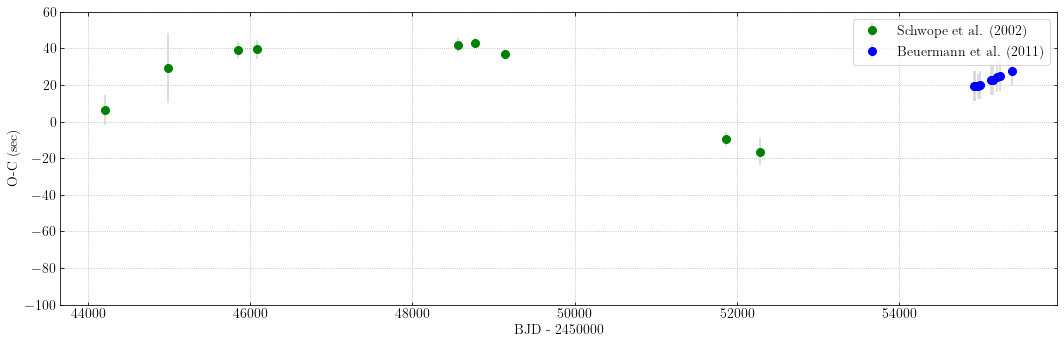

In [37]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#plt.errorbar(x1_aver, y1_aver, yerr = y1_std, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x1_aver, y1_aver, yerr = y1_err, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_aver, y2_aver, yerr = y2_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x3_aver, y3_aver, yerr = y3_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x4_aver, y4_aver, yerr = y4_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x5_aver, y5_aver, yerr = y5_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x6_aver, y6_aver, yerr = y6_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x7_aver, y7_aver, yerr = y7_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x8_aver, y8_aver, yerr = y8_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x9_aver, y9_aver, yerr = y9_err, fmt='o', markersize=8, color='green',ecolor='lightgray')

plt.errorbar(x10_aver, y10_aver, yerr = y10_err, fmt='o', markersize=8, color='blue',ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_aver, y11_aver, yerr = y11_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x12_aver, y12_aver, yerr = y12_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x13_aver, y13_aver, yerr = y13_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x14_aver, y14_aver, yerr = y14_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x15_aver, y15_aver, yerr = y15_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x16_aver, y16_aver, yerr = y16_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x17_aver, y17_aver, yerr = y17_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x18_aver, y18_aver, yerr = y18_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')



#Schwope_2002
#plt.text(x1_aver, 62, '1979')
#plt.text(x2_aver, 62, '1981')
#plt.text(x3_aver-60, 62, '1984')
#plt.text(x4_aver+60, 62, '1985')
#plt.text(x5_aver-150, 62, '1991')
#plt.text(x6_aver, 62, '1992')
#plt.text(x7_aver, 62, '1993')
#plt.text(x8_aver, 62, '2000')
#plt.text(x9_aver, 62, '2002')
#plt.text(x10_aver-100, 62, '2009')
#plt.text(x16_aver+50, 62, '2010')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-100,60)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 19. Read input file: This work

In [38]:
#Input file: Beuermann_2011
DP_Leo_Kittipong_2020 = open("Kittipong_2020.dat",'r').readlines()
N_dpleo_Kittipong_2020 = len(DP_Leo_Kittipong_2020)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Kittipong_2020.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

#### 20. Check the year and the local time of observation: This work

In [39]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Kittipong_2020))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Kittipong_2020)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56670.34677356 2014-01-13 08:19:21.235597
1 56717.36835247 2014-03-01 08:50:25.653406
2 56748.30036724 2014-04-01 07:12:31.729524
3 57100.33871551 2015-03-19 08:07:45.020062
4 57101.14945633 2015-03-20 03:35:13.026921
5 57748.28884756 2016-12-26 06:55:56.429189
6 57748.35119104 2016-12-26 08:25:42.905867
7 57802.23271517 2017-02-18 05:35:06.590679
8 57802.41981902 2017-02-18 10:04:32.363345
9 57829.36056651 2017-03-17 08:39:12.946454
10 58140.42647328 2018-01-22 10:14:07.291387
11 58200.23245417 2018-03-23 05:34:44.040288
12 58542.41740511 2019-02-28 10:01:03.801491
13 58580.0845501 2019-04-07 02:01:45.128632
14 58851.30060629 2020-01-03 07:12:52.383445
15 58870.25888747 2020-01-22 06:12:47.877388
16 58870.38363828 2020-01-22 09:12:26.347390
17 58871.1943114 2020-01-23 04:39:48.504955
18 58871.2567542 2020-01-23 06:09:43.562877
19 58873.31469828 2020-01-25 07:33:09.931377
20 58873.4394328 2020-01-25 10:32:46.993904
21 58880.17462731 2020-02-01 04:11:27.799595
22 58909.29802913 2020-0

#### 21. Arrays of This work

In [40]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT_err = [i for i in range(N_dpleo_Kittipong_2020)]
E_af = [i for i in range(N_dpleo_Kittipong_2020)] #float number
E_ak = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
E_aj = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
P_aE = [i for i in range(N_dpleo_Kittipong_2020)]
P_err_aE = [i for i in range(N_dpleo_Kittipong_2020)]
T_aC_linear = [i for i in range(N_dpleo_Kittipong_2020)]
T_aO_linear = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_a = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_std_a = [i for i in range(N_dpleo_Kittipong_2020)]

#### 22. The O-C calculation of This work

In [41]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Kittipong_2020):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Kittipong_2020.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	56670.346774	126632	56670.346774	56670.346094	58.703327	8.222143
1	56717.368352	127386	56717.368352	56717.367677	58.322269	8.258570
2	56748.300367	127882	56748.300367	56748.299647	62.196479	9.288486
3	57100.338716	133527	57100.338716	57100.337894	70.991394	8.816546
4	57101.149456	133540	57101.149456	57101.148611	73.053434	8.377243
5	57748.288848	143917	57748.288848	57748.287828	88.049865	9.713895
6	57748.351191	143918	57748.351191	57748.350191	86.376936	9.708404
7	57802.232715	144782	57802.232715	57802.231687	88.806816	9.151313
8	57802.419819	144785	57802.419819	57802.418776	90.130653	9.266568
9	57829.360567	145217	57829.360567	57829.359524	90.086313	8.902417
10	58140.426473	150205	58140.426473	58140.425383	94.223249	9.651369
11	58200.232454	151164	58200.232454	58200.231349	95.505131	9.625863
12	58542.417405	156651	58542.417405	58542.416266	98.407635	8.959256
13	58580.084550	157255	58580.084550	58580.083423	97.375984

#### 23. The O-C diagram of This work

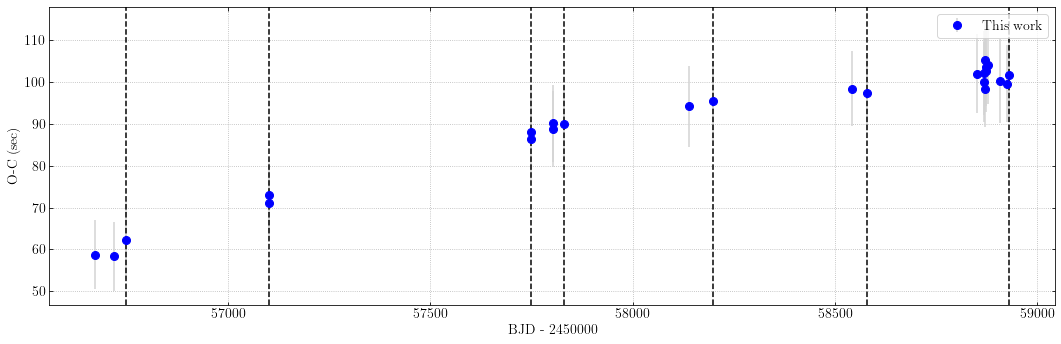

In [42]:
#Plot O-C vs BJD
Input_Kittipong_2020  = 'Kittipong_2020.out'
Data_Kittipong_2020   = np.genfromtxt(Input_Kittipong_2020)

N = 2450000
BJD_time_Kittipong_2020 = Data_Kittipong_2020[:,0]
Cycle_Kittipong_2020 = Data_Kittipong_2020[:,1]
T_O_linear_Kittipong_2020 = Data_Kittipong_2020[:,2]
T_C_linear_Kittipong_2020 = Data_Kittipong_2020[:,3]
OC_s_Kittipong_2020 = Data_Kittipong_2020[:,4]
OC_s_err_Kittipong_2020 = Data_Kittipong_2020[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Kittipong_2020)
x2 = max(BJD_time_Kittipong_2020)
plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'This work')


plt.axvline(x= BJD_time_Kittipong_2020[2], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[4], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[6], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[9], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[11], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[13], color='k', linestyle='--')
plt.axvline(x= BJD_time_Kittipong_2020[24], color='k', linestyle='--')


#plt.text(BJD_time_Beuermann_2011[8], -25, '1')


#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Beuermann_2011.jpg", dpi=1000)
plt.show()

#### 24. Group the data for calculating weighted mean: This work

In [43]:
#Checkinng month,year from BJD
BJD_time = Data_Kittipong_2020[:,0]
OC_s = Data_Kittipong_2020[:,4]
OC_s_err = Data_Kittipong_2020[:,5]


gp19 = []
gp20 = []
gp21 = []
gp22 = []
gp23 = []
gp24 = []
gp25 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[2] >= BJD_time[i]:        #gp19
        gp19.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[4] >= BJD_time[i]:       #gp20
        gp20.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[6] >= BJD_time[i]:       #gp21
        gp21.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[9] >= BJD_time[i]:       #gp22
        gp22.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[11] >= BJD_time[i]:       #gp23
        gp23.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[13] >= BJD_time[i]:       #gp24
        gp24.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[24] >= BJD_time[i]:       #gp25
        gp25.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))

#-------------------------- Group19 -----------#        
rerults = gp19
f = open('Weighted_mean_calculation_gp19.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group20 -----------#        
rerults = gp20
f = open('Weighted_mean_calculation_gp20.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group21 -----------#        
rerults = gp21
f = open('Weighted_mean_calculation_gp21.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group22 -----------#        
rerults = gp22
f = open('Weighted_mean_calculation_gp22.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group23 -----------#        
rerults = gp23
f = open('Weighted_mean_calculation_gp23.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group24 -----------#        
rerults = gp24
f = open('Weighted_mean_calculation_gp24.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group25 -----------#        
rerults = gp25
f = open('Weighted_mean_calculation_gp25.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 2014-01-13 08:19:21.273618 56670.346774 58.703327 8.222143
1 2014-03-01 08:50:25.612811 56717.368352 58.322269 8.25857
2 2014-04-01 07:12:31.708804 56748.300367 62.196479 9.288486
3 2015-03-19 08:07:45.062387 57100.338716 70.991394 8.816546
4 2015-03-20 03:35:12.998396 57101.149456 73.053434 8.377243
5 2016-12-26 06:55:56.467209 57748.288848 88.049865 9.713895
6 2016-12-26 08:25:42.902407 57748.351191 86.376936 9.708404
7 2017-02-18 05:35:06.575994 57802.232715 88.806816 9.151313
8 2017-02-18 10:04:32.361615 57802.419819 90.130653 9.266568
9 2017-03-17 08:39:12.988819 57829.360567 90.086313 8.902417
10 2018-01-22 10:14:07.267207 58140.426473 94.223249 9.651369
11 2018-03-23 05:34:44.025603 58200.232454 95.505131 9.625863
12 2019-02-28 10:01:03.791996 58542.417405 98.407635 8.959256
13 2019-04-07 02:01:45.119982 58580.08455 97.375984 9.134641
14 2020-01-03 07:12:52.358380 58851.300606 102.017618 9.510327
15 2020-01-22 06:12:47.8

#### 25. Check number of data for each group

In [44]:
#The 19th set of data point:
Input_gp19 = "Weighted_mean_calculation_gp19.txt"
Data_gp19   = np.genfromtxt(Input_gp19)
N_data_gp19 = len(Data_gp19)
print('Number of data group#19:',N_data_gp19)

#The 20th set of data point:
Input_gp20 = "Weighted_mean_calculation_gp20.txt"
Data_gp20   = np.genfromtxt(Input_gp20)
N_data_gp20 = len(Data_gp20)
print('Number of data group#20:',N_data_gp20)

#The 21st set of data point:
Input_gp21 = "Weighted_mean_calculation_gp21.txt"
Data_gp21   = np.genfromtxt(Input_gp21)
N_data_gp21 = len(Data_gp21)
print('Number of data group#21:',N_data_gp21)

#The 22nd set of data point:
Input_gp22 = "Weighted_mean_calculation_gp22.txt"
Data_gp22   = np.genfromtxt(Input_gp22)
N_data_gp22 = len(Data_gp22)
print('Number of data group#22:',N_data_gp22)

#The 23rd set of data point:
Input_gp23 = "Weighted_mean_calculation_gp23.txt"
Data_gp23   = np.genfromtxt(Input_gp23)
N_data_gp23 = len(Data_gp23)
print('Number of data group#23:',N_data_gp23)

#The 24th set of data point:
Input_gp24 = "Weighted_mean_calculation_gp24.txt"
Data_gp24   = np.genfromtxt(Input_gp24)
N_data_gp24 = len(Data_gp24)
print('Number of data group#24:',N_data_gp24)

#The 25th set of data point:
Input_gp25 = "Weighted_mean_calculation_gp25.txt"
Data_gp25   = np.genfromtxt(Input_gp25)
N_data_gp25 = len(Data_gp25)
print('Number of data group#24:',N_data_gp25)

Number of data group#19: 3
Number of data group#20: 2
Number of data group#21: 2
Number of data group#22: 3
Number of data group#23: 2
Number of data group#24: 2
Number of data group#24: 11


#### 26. Weighted mean calculation 

In [45]:
#Group19
OC_a19 = [i for i in range(N_data_gp19)]
OC_err_a19 = [i for i in range(N_data_gp19)]
w_a19 = [i for i in range(N_data_gp19)]
y_a19 = [i for i in range(N_data_gp19)]

for i in range(N_data_gp19):
    BJD_time = Data_gp19[:,0]                   #Input file of x
    OC_s = Data_gp19[:,1]                       #Input file of y
    OC_a19[i] = OC_s 
    OC_s_err = Data_gp19[:,2]                   #Input file of y_err
    OC_err_a19[i] = OC_s_err
    w = 1/(OC_err_a19[i])**2                    #calculate the weighting factor
    w_a19[i] = w
    y = (w_a19[i]*OC_a19[i])                     #Calculate the weighting factor and the y-value
    y_a19[i] = y
    y_sum = np.sum(y_a19)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a19)                       #Sum the weighting factor 
    dy = (w_a19[i]*OC_err_a19[i])/np.sum(w_a19[i])
#print(y_sum, w_sum)
x19_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y19_aver = y_sum/w_sum                         #Calculate the weighted mean
y19_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x19_aver)                   #Print Mean BJD
print('Weighted OC:', y19_aver)                #Print the weighted mean
print('Weighted OC_err:',y19_err)              #Print the error of the weighted mean

Mean BJD: 56712.00516433333
Weighted OC: 59.553645580934905
Weighted OC_err: 8.536282432279538


/Users/kittipongwangnok/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [46]:
#Group20
OC_a20 = [i for i in range(N_data_gp20)]
OC_err_a20 = [i for i in range(N_data_gp20)]
w_a20 = [i for i in range(N_data_gp20)]
y_a20 = [i for i in range(N_data_gp20)]

for i in range(N_data_gp20):
    BJD_time = Data_gp20[:,0]                   #Input file of x
    OC_s = Data_gp20[:,1]                       #Input file of y
    OC_a20[i] = OC_s 
    OC_s_err = Data_gp20[:,2]                   #Input file of y_err
    OC_err_a20[i] = OC_s_err
    w = 1/(OC_err_a20[i])**2                    #calculate the weighting factor
    w_a20[i] = w
    y = (w_a20[i]*OC_a20[i])                     #Calculate the weighting factor and the y-value
    y_a20[i] = y
    y_sum = np.sum(y_a20)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a20)                       #Sum the weighting factor 
    dy = (w_a20[i]*OC_err_a20[i])/np.sum(w_a20[i])
#print(y_sum, w_sum)
x20_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y20_aver = y_sum/w_sum                         #Calculate the weighted mean
y20_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x20_aver)                   #Print Mean BJD
print('Weighted OC:', y20_aver)                #Print the weighted mean
print('Weighted OC_err:',y20_err)              #Print the error of the weighted mean

Mean BJD: 57100.744086
Weighted OC: 72.0750649538676
Weighted OC_err: 8.585677587628318


In [47]:
#Group21
OC_a21 = [i for i in range(N_data_gp21)]
OC_err_a21 = [i for i in range(N_data_gp21)]
w_a21 = [i for i in range(N_data_gp21)]
y_a21 = [i for i in range(N_data_gp21)]

for i in range(N_data_gp21):
    BJD_time = Data_gp21[:,0]                   #Input file of x
    OC_s = Data_gp21[:,1]                       #Input file of y
    OC_a21[i] = OC_s 
    OC_s_err = Data_gp21[:,2]                   #Input file of y_err
    OC_err_a21[i] = OC_s_err
    w = 1/(OC_err_a21[i])**2                    #calculate the weighting factor
    w_a21[i] = w
    y = (w_a21[i]*OC_a21[i])                     #Calculate the weighting factor and the y-value
    y_a21[i] = y
    y_sum = np.sum(y_a21)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a21)                       #Sum the weighting factor 
    dy = (w_a21[i]*OC_err_a21[i])/np.sum(w_a21[i])
#print(y_sum, w_sum)
x21_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y21_aver = y_sum/w_sum                         #Calculate the weighted mean
y21_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x21_aver)                   #Print Mean BJD
print('Weighted OC:', y21_aver)                #Print the weighted mean
print('Weighted OC_err:',y21_err)              #Print the error of the weighted mean

Mean BJD: 57748.320019499995
Weighted OC: 87.21292753578474
Weighted OC_err: 9.711147947605067


In [48]:
#Group22
OC_a22 = [i for i in range(N_data_gp22)]
OC_err_a22 = [i for i in range(N_data_gp22)]
w_a22 = [i for i in range(N_data_gp22)]
y_a22 = [i for i in range(N_data_gp22)]

for i in range(N_data_gp22):
    BJD_time = Data_gp22[:,0]                   #Input file of x
    OC_s = Data_gp22[:,1]                       #Input file of y
    OC_a22[i] = OC_s 
    OC_s_err = Data_gp22[:,2]                   #Input file of y_err
    OC_err_a22[i] = OC_s_err
    w = 1/(OC_err_a22[i])**2                    #calculate the weighting factor
    w_a22[i] = w
    y = (w_a22[i]*OC_a22[i])                     #Calculate the weighting factor and the y-value
    y_a22[i] = y
    y_sum = np.sum(y_a22)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a22)                       #Sum the weighting factor 
    dy = (w_a22[i]*OC_err_a22[i])/np.sum(w_a22[i])
#print(y_sum, w_sum)
x22_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y22_aver = y_sum/w_sum                         #Calculate the weighted mean
y22_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x22_aver)                   #Print Mean BJD
print('Weighted OC:', y22_aver)                #Print the weighted mean
print('Weighted OC_err:',y22_err)              #Print the error of the weighted mean

Mean BJD: 57811.33770033333
Weighted OC: 89.67857476571893
Weighted OC_err: 9.101641740856962


In [49]:
#Group23
OC_a23 = [i for i in range(N_data_gp23)]
OC_err_a23 = [i for i in range(N_data_gp23)]
w_a23 = [i for i in range(N_data_gp23)]
y_a23 = [i for i in range(N_data_gp23)]

for i in range(N_data_gp23):
    BJD_time = Data_gp22[:,0]                   #Input file of x
    OC_s = Data_gp23[:,1]                       #Input file of y
    OC_a23[i] = OC_s 
    OC_s_err = Data_gp23[:,2]                   #Input file of y_err
    OC_err_a23[i] = OC_s_err
    w = 1/(OC_err_a23[i])**2                    #calculate the weighting factor
    w_a23[i] = w
    y = (w_a23[i]*OC_a23[i])                     #Calculate the weighting factor and the y-value
    y_a23[i] = y
    y_sum = np.sum(y_a23)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a23)                       #Sum the weighting factor 
    dy = (w_a23[i]*OC_err_a23[i])/np.sum(w_a23[i])
#print(y_sum, w_sum)
x23_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y23_aver = y_sum/w_sum                         #Calculate the weighted mean
y23_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x23_aver)                   #Print Mean BJD
print('Weighted OC:', y23_aver)                #Print the weighted mean
print('Weighted OC_err:',y23_err)              #Print the error of the weighted mean

Mean BJD: 57811.33770033333
Weighted OC: 94.86588607467786
Weighted OC_err: 9.638582252681033


In [50]:
#Group24
OC_a24 = [i for i in range(N_data_gp24)]
OC_err_a24 = [i for i in range(N_data_gp24)]
w_a24 = [i for i in range(N_data_gp24)]
y_a24 = [i for i in range(N_data_gp24)]

for i in range(N_data_gp24):
    BJD_time = Data_gp24[:,0]                   #Input file of x
    OC_s = Data_gp24[:,1]                       #Input file of y
    OC_a24[i] = OC_s 
    OC_s_err = Data_gp24[:,2]                   #Input file of y_err
    OC_err_a24[i] = OC_s_err
    w = 1/(OC_err_a24[i])**2                    #calculate the weighting factor
    w_a24[i] = w
    y = (w_a24[i]*OC_a24[i])                     #Calculate the weighting factor and the y-value
    y_a24[i] = y
    y_sum = np.sum(y_a24)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a24)                       #Sum the weighting factor 
    dy = (w_a24[i]*OC_err_a24[i])/np.sum(w_a24[i])
#print(y_sum, w_sum)
x24_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y24_aver = y_sum/w_sum                         #Calculate the weighted mean
y24_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x24_aver)                   #Print Mean BJD
print('Weighted OC:', y24_aver)                #Print the weighted mean
print('Weighted OC_err:',y24_err)              #Print the error of the weighted mean

Mean BJD: 58561.2509775
Weighted OC: 97.90180840252219
Weighted OC_err: 9.045248644604275


In [51]:
#Group25
OC_a25 = [i for i in range(N_data_gp25)]
OC_err_a25 = [i for i in range(N_data_gp25)]
w_a25 = [i for i in range(N_data_gp25)]
y_a25 = [i for i in range(N_data_gp25)]

for i in range(N_data_gp25):
    BJD_time = Data_gp25[:,0]                   #Input file of x
    OC_s = Data_gp25[:,1]                       #Input file of y
    OC_a25[i] = OC_s 
    OC_s_err = Data_gp25[:,2]                   #Input file of y_err
    OC_err_a25[i] = OC_s_err
    w = 1/(OC_err_a25[i])**2                    #calculate the weighting factor
    w_a25[i] = w
    y = (w_a25[i]*OC_a25[i])                     #Calculate the weighting factor and the y-value
    y_a25[i] = y
    y_sum = np.sum(y_a25)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a25)                       #Sum the weighting factor 
    dy = (w_a25[i]*OC_err_a25[i])/np.sum(w_a25[i])
#print(y_sum, w_sum)
x25_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y25_aver = y_sum/w_sum                         #Calculate the weighted mean
y25_err = np.sum(dy)                 #Calculate the standard deviation

print('Mean BJD:', x25_aver)                   #Print Mean BJD
print('Weighted OC:', y25_aver)                #Print the weighted mean
print('Weighted OC_err:',y25_err)              #Print the error of the weighted mean

Mean BJD: 58884.35291027271
Weighted OC: 101.80118327020648
Weighted OC_err: 9.546765991417097


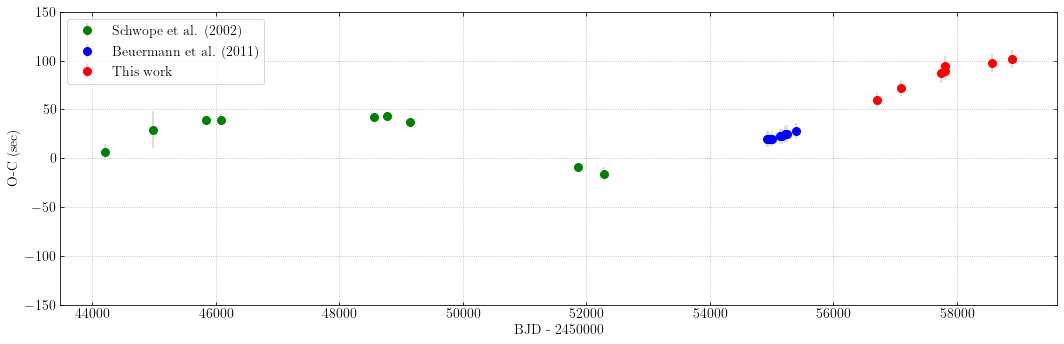

In [52]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_aver, y1_aver, yerr = y1_err, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_aver, y2_aver, yerr = y2_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x3_aver, y3_aver, yerr = y3_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x4_aver, y4_aver, yerr = y4_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x5_aver, y5_aver, yerr = y5_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x6_aver, y6_aver, yerr = y6_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x7_aver, y7_aver, yerr = y7_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x8_aver, y8_aver, yerr = y8_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x9_aver, y9_aver, yerr = y9_err, fmt='o', markersize=8, color='green',ecolor='lightgray')

plt.errorbar(x10_aver, y10_aver, yerr = y10_err, fmt='o', markersize=8, color='blue',ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_aver, y11_aver, yerr = y11_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x12_aver, y12_aver, yerr = y12_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x13_aver, y13_aver, yerr = y13_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x14_aver, y14_aver, yerr = y14_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x15_aver, y15_aver, yerr = y15_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x16_aver, y16_aver, yerr = y16_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x17_aver, y17_aver, yerr = y17_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x18_aver, y18_aver, yerr = y18_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')



plt.errorbar(x19_aver, y19_aver, yerr = y19_err, fmt='o', markersize=8, color='red',ecolor='lightgray', label = 'This work')
plt.errorbar(x20_aver, y20_aver, yerr = y20_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x21_aver, y21_aver, yerr = y21_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x22_aver, y22_aver, yerr = y22_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x23_aver, y23_aver, yerr = y23_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x24_aver, y24_aver, yerr = y24_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x25_aver, y25_aver, yerr = y25_err, fmt='o', markersize=8, color='red',ecolor='lightgray')

#plt.text(x19_aver-200, 62, '2014')



#Schwope_2002
#plt.text(x1_aver, 62, '1979')
#plt.text(x2_aver, 62, '1981')
#plt.text(x3_aver-60, 62, '1984')
#plt.text(x4_aver+60, 62, '1985')
#plt.text(x5_aver-150, 62, '1991')
#plt.text(x6_aver, 62, '1992')
#plt.text(x7_aver, 62, '1993')
#plt.text(x8_aver, 62, '2000')
#plt.text(x9_aver, 62, '2002')
#plt.text(x10_aver-100, 62, '2009')
#plt.text(x16_aver+50, 62, '2010')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 27. Read input file: Boyd_2012

In [54]:
#Input file: Beuermann_2011
DP_Leo_David_2012 = open("David_2012.dat",'r').readlines()
N_dpleo_David_2012 = len(DP_Leo_David_2012)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("David_2012.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

#### 28. Check the year and the local time of observation: Boyd_2012

In [55]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_David_2012))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_David_2012)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56004.24921 2012-03-18 05:58:51.744003
1 56403.30917 2013-04-21 07:25:12.287981
2 56772.18547 2014-04-25 04:27:04.607992
3 57453.81143 2016-03-06 19:28:27.551980
4 57846.8222 2017-04-03 19:43:58.079984
5 58187.51041 2018-03-10 12:14:59.424009
6 58593.24301 2019-04-20 05:49:56.063987
7 58934.11856 2020-03-26 02:50:43.583987
8 59317.08867 2021-04-13 02:07:41.087997


#### 29. Arrays of Boyd_2012

In [56]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_David_2012)]
Delta_aT = [i for i in range(N_dpleo_David_2012)]
Delta_aT_err = [i for i in range(N_dpleo_David_2012)]
E_af = [i for i in range(N_dpleo_David_2012)] #float number
E_ak = [i for i in range(N_dpleo_David_2012)] #integer number
E_aj = [i for i in range(N_dpleo_David_2012)] #integer number
P_aE = [i for i in range(N_dpleo_David_2012)]
P_err_aE = [i for i in range(N_dpleo_David_2012)]
T_aC_linear = [i for i in range(N_dpleo_David_2012)]
T_aO_linear = [i for i in range(N_dpleo_David_2012)]
P_aver_a = [i for i in range(N_dpleo_David_2012)]
P_aver_std_a = [i for i in range(N_dpleo_David_2012)]

#### 30. The O-C calculation of Boys_2012

In [57]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_David_2012):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("David_2012.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	56004.249210	115951	56004.249210	56004.248572	55.096179	6.072678
1	56403.309170	122350	56403.309170	56403.308402	66.345684	7.674065
2	56772.185470	128265	56772.185470	56772.184616	73.777898	6.870124
3	57453.811430	139195	57453.811430	57453.810486	81.586903	8.884966
4	57846.822200	145497	57846.822200	57846.821120	93.331670	7.975509
5	58187.510410	150960	58187.510410	58187.509329	93.407373	8.554914
6	58593.243010	157466	58593.243010	58593.241983	88.745609	10.696304
7	58934.118560	162932	58934.118560	58934.117281	110.548511	9.126090
8	59317.088670	169073	59317.088670	59317.087497	101.354981	10.183055


#### 31. The O-C diagram of This work

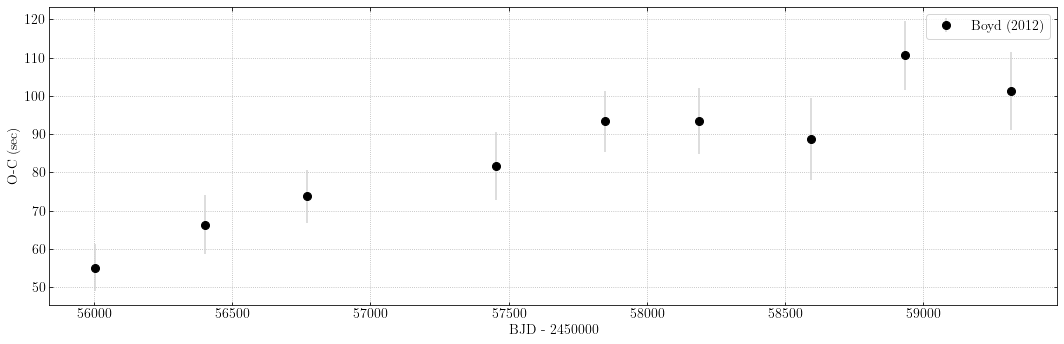

In [58]:
#Plot O-C vs BJD
Input_David_2012  = 'David_2012.out'
Data_David_2012   = np.genfromtxt(Input_David_2012)

N = 2450000
BJD_time_David_2012 = Data_David_2012[:,0]
Cycle_David_2012 = Data_David_2012[:,1]
T_O_linear_David_2012 = Data_David_2012[:,2]
T_C_linear_David_2012 = Data_David_2012[:,3]
OC_s_David_2012 = Data_David_2012[:,4]
OC_s_err_David_2012 = Data_David_2012[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_David_2012)
x2 = max(BJD_time_David_2012)
plt.errorbar(BJD_time_David_2012, OC_s_David_2012, yerr= OC_s_err_David_2012, fmt='o', markersize=8, color='black',
                    ecolor='lightgray', label = 'Boyd (2012)')

#Kittipong_2020
#plt.text(BJD_time_Kittipong_2020[0], 56, '2014')
#plt.text(BJD_time_Kittipong_2020[3], 56, '2015')
#plt.text(BJD_time_Kittipong_2020[5]-50, 56, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 56, '2017')
#plt.text(BJD_time_Kittipong_2020[10], 56, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 56, '2019')
#plt.text(BJD_time_Kittipong_2020[14], 56, '2020')



#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_David_2012_rev1.jpg", dpi=1000)
plt.show()

#### 32. The combination of the O-C diagram 

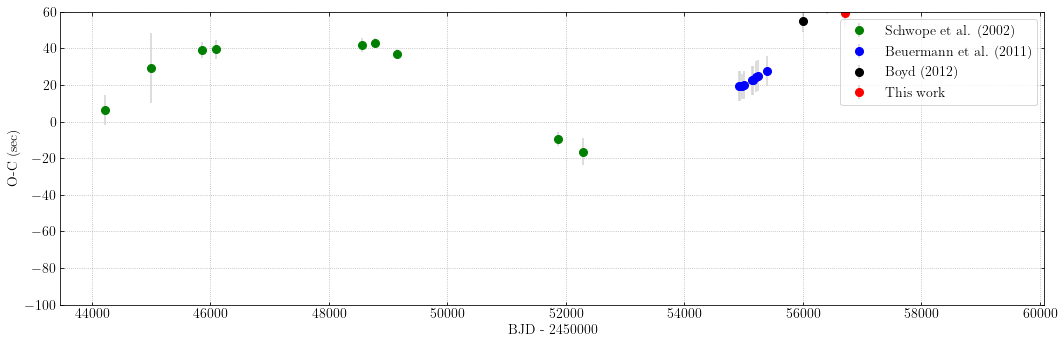

In [59]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_aver, y1_aver, yerr = y1_err, fmt='o', markersize=8, color='green',ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_aver, y2_aver, yerr = y2_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x3_aver, y3_aver, yerr = y3_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x4_aver, y4_aver, yerr = y4_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x5_aver, y5_aver, yerr = y5_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x6_aver, y6_aver, yerr = y6_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x7_aver, y7_aver, yerr = y7_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x8_aver, y8_aver, yerr = y8_err, fmt='o', markersize=8, color='green',ecolor='lightgray')
plt.errorbar(x9_aver, y9_aver, yerr = y9_err, fmt='o', markersize=8, color='green',ecolor='lightgray')

plt.errorbar(x10_aver, y10_aver, yerr = y10_err, fmt='o', markersize=8, color='blue',ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_aver, y11_aver, yerr = y11_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x12_aver, y12_aver, yerr = y12_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x13_aver, y13_aver, yerr = y13_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x14_aver, y14_aver, yerr = y14_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x15_aver, y15_aver, yerr = y15_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x16_aver, y16_aver, yerr = y16_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x17_aver, y17_aver, yerr = y17_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')
plt.errorbar(x18_aver, y18_aver, yerr = y18_err, fmt='o', markersize=8, color='blue',ecolor='lightgray')

plt.errorbar(BJD_time_David_2012, OC_s_David_2012, yerr= OC_s_err_David_2012, fmt='o', markersize=8, color='black',
                    ecolor='lightgray', label = 'Boyd (2012)')

plt.errorbar(x19_aver, y19_aver, yerr = y19_err, fmt='o', markersize=8, color='red',ecolor='lightgray', label = 'This work')
plt.errorbar(x20_aver, y20_aver, yerr = y20_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x21_aver, y21_aver, yerr = y21_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x22_aver, y22_aver, yerr = y22_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x23_aver, y23_aver, yerr = y23_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x24_aver, y24_aver, yerr = y24_err, fmt='o', markersize=8, color='red',ecolor='lightgray')
plt.errorbar(x25_aver, y25_aver, yerr = y25_err, fmt='o', markersize=8, color='red',ecolor='lightgray')

#plt.text(x19_aver-200, 62, '2014')



#Schwope_2002
#plt.text(x1_aver, 62, '1979')
#plt.text(x2_aver, 62, '1981')
#plt.text(x3_aver-60, 62, '1984')
#plt.text(x4_aver+60, 62, '1985')
#plt.text(x5_aver-150, 62, '1991')
#plt.text(x6_aver, 62, '1992')
#plt.text(x7_aver, 62, '1993')
#plt.text(x8_aver, 62, '2000')
#plt.text(x9_aver, 62, '2002')
#plt.text(x10_aver-100, 62, '2009')
#plt.text(x16_aver+50, 62, '2010')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-100,60)
plt.xlabel('BJD - '+str(N))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011.jpg", dpi=1000)
plt.show()

#### 33. Save the text file

In [60]:
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_01.out', np.c_[x1_aver, y1_aver, y1_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_02.out', np.c_[x2_aver, y2_aver, y2_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_03.out', np.c_[x3_aver, y3_aver, y3_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_04.out', np.c_[x4_aver, y4_aver, y4_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_05.out', np.c_[x5_aver, y5_aver, y5_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_06.out', np.c_[x6_aver, y6_aver, y6_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_07.out', np.c_[x7_aver, y7_aver, y7_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_08.out', np.c_[x8_aver, y8_aver, y8_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_09.out', np.c_[x9_aver, y9_aver, y9_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_10.out', np.c_[x10_aver, y10_aver, y10_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_11.out', np.c_[x11_aver, y11_aver, y11_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_12.out', np.c_[x12_aver, y12_aver, y12_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_13.out', np.c_[x13_aver, y13_aver, y13_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_14.out', np.c_[x14_aver, y14_aver, y14_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_15.out', np.c_[x15_aver, y15_aver, y15_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_16.out', np.c_[x16_aver, y16_aver, y16_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_17.out', np.c_[x17_aver, y17_aver, y17_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_18.out', np.c_[x18_aver, y18_aver, y18_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_19.out', np.c_[x19_aver, y19_aver, y19_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_20.out', np.c_[x20_aver, y20_aver, y20_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_21.out', np.c_[x21_aver, y21_aver, y21_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_22.out', np.c_[x22_aver, y22_aver, y22_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_23.out', np.c_[x23_aver, y23_aver, y23_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_24.out', np.c_[x24_aver, y24_aver, y24_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_25.out', np.c_[x25_aver, y25_aver, y25_err], fmt="%.5f")
np.savetxt('2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_David.out', np.c_[BJD_time_David_2012, OC_s_David_2012, OC_s_err_David_2012], fmt="%.5f")